Simple interaction example again, but this time comparing different loss functions with outliers.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from vcboost import VCBooster
from vcboost.loss import LS, LAD

# Generate Data

In [2]:
n = 1000  # sample size for this example
n_out = 25  # number of outliers

rng = np.random.default_rng(975)  # set up random number generator

# design matrix for parametric coefficients (intercept plus one covariate)
X = np.ones((n, 2))
X[:, 1] = rng.uniform(-1, 1, n)

Z = rng.choice([0, 1], n)  # effect modifier, either 0 or 1

eps = rng.normal(0, 4, n)  # noise

beta_0 = np.array([-10, 5])  # vector with parametric coefficients
beta_1 = np.array([5, -10])  # another vector with parametric coefficients

# parametric model for y depends on effect modifier Z
y = (X @ beta_0) * (Z == 0) + (X @ beta_1) * (Z == 1) + eps

# add some ugly outliers
out_idx = (np.where(X[:, 1] < -0.7)[0])[:n_out]  # indices in 1, ..., n that contain outliers
out_values = rng.normal(100, 0.5, n_out)  # outlier realizations

y[out_idx] = out_values  # add outliers to y

# also get clean version of dataset with outliers removed
X_clean = np.delete(X, out_idx, axis=0)
Z_clean = np.delete(Z, out_idx, axis=0)
y_clean = np.delete(y, out_idx, axis=0)

# Fit varying coefficient models with different loss functions<

In [3]:
model_ls = VCBooster(learning_rate=0.1, n_stages=50, loss=LS())  # first model uses least squares (LS)
model_lad = VCBooster(learning_rate=0.1, n_stages=50, loss=LAD())  # second model uses least absolute deviation (LAD)

# fit LS model to RAW data set and predict RAW data set
y_hat_ls_raw = model_ls.fit(X, Z.reshape(-1, 1), y).predict(X, Z.reshape(-1, 1))

# fit LS model to CLEAN data set and predict RAW data set
y_hat_ls_clean = model_ls.fit(X_clean, Z_clean.reshape(-1, 1), y_clean).predict(X, Z.reshape(-1, 1))

# fit LAD model to RAW data set and predict RAW data set
y_hat_lad_raw = model_lad.fit(X, Z.reshape(-1, 1), y).predict(X, Z.reshape(-1, 1))

# fit LAD model to CLEAN data set and predict RAW data set
y_hat_lad_clean = model_lad.fit(X_clean, Z_clean.reshape(-1, 1), y_clean).predict(X, Z.reshape(-1, 1))

# Inspect results

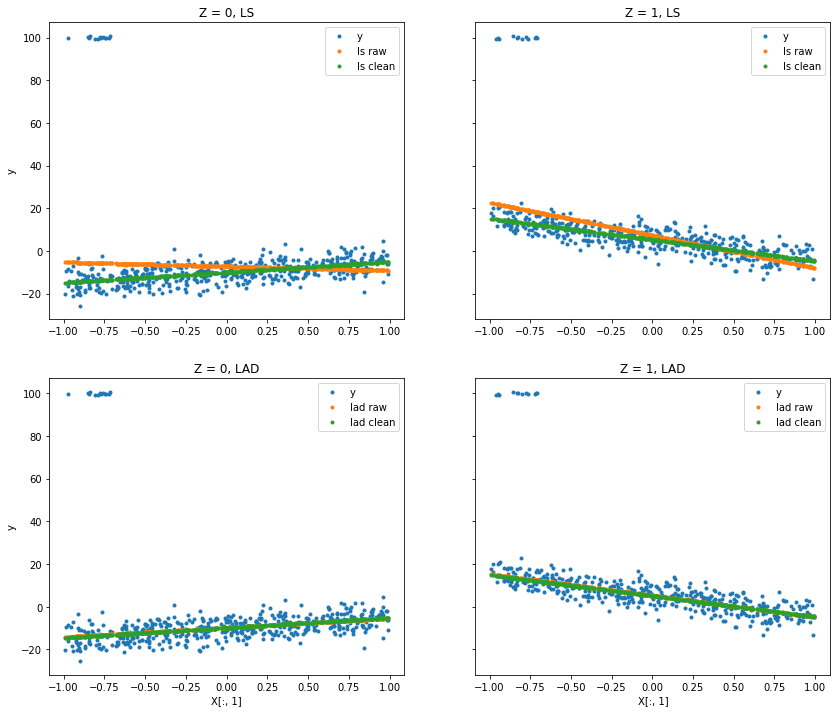

In [4]:
fig, ax = plt.subplots(2, 2, sharey=True, figsize=(14, 12))

ax[0, 0].plot(X[Z == 0, 1], y[Z == 0], '.', label='y')  # data for Z == 0 in upper row
ax[0, 1].plot(X[Z == 1, 1], y[Z == 1], '.', label='y')  # data for Z == 1 in upper row
ax[1, 0].plot(X[Z == 0, 1], y[Z == 0], '.', label='y')  # data for Z == 0 in lower row
ax[1, 1].plot(X[Z == 1, 1], y[Z == 1], '.', label='y')  # data for Z == 1 in lower row

# plot LS result in upper row
ax[0, 0].plot(X[Z == 0, 1], y_hat_ls_raw[Z == 0], '.', label='ls raw')
ax[0, 1].plot(X[Z == 1, 1], y_hat_ls_raw[Z == 1], '.', label='ls raw')
ax[0, 0].plot(X[Z == 0, 1], y_hat_ls_clean[Z == 0], '.', label='ls clean')
ax[0, 1].plot(X[Z == 1, 1], y_hat_ls_clean[Z == 1], '.', label='ls clean')

# plot LAD results in lower row
ax[1, 0].plot(X[Z == 0, 1], y_hat_lad_raw[Z == 0], '.', label='lad raw')
ax[1, 1].plot(X[Z == 1, 1], y_hat_lad_raw[Z == 1], '.', label='lad raw')
ax[1, 0].plot(X[Z == 0, 1], y_hat_lad_clean[Z == 0], '.', label='lad clean')
ax[1, 1].plot(X[Z == 1, 1], y_hat_lad_clean[Z == 1], '.', label='lad clean')

# add labels and legend
ax[0, 0].set_title('Z = 0, LS'); ax[0, 1].set_title('Z = 1, LS')
ax[1, 0].set_title('Z = 0, LAD'); ax[1, 1].set_title('Z = 1, LAD')
ax[1, 0].set_xlabel('X[:, 1]'); ax[1, 1].set_xlabel('X[:, 1]')
ax[0, 0].set_ylabel('y'); ax[1, 0].set_ylabel('y')

ax[0, 0].legend(); ax[0, 1].legend(); ax[1, 0].legend(); ax[1, 1].legend()